In [2]:
path=""
setwd(path)
mydata = read.csv("data.csv", sep=";")
mydata = subset(mydata, select = -c(time))
log.ir <- log(mydata[,0:7])
ir.label <- mydata[,8]
ir.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)
print(ir.pca)



Standard deviations (1, .., p=7):
[1] 2.575346e+00 5.641791e-01 1.902416e-01 9.519173e-02 6.356248e-02
[6] 3.452344e-16 1.449013e-17

Rotation (n x k) = (7 x 7):
                   PC1        PC2          PC3         PC4        PC5
PAPI_L1_DCM  0.3858933 -0.1800713  0.108869682  0.26573801 -0.4859953
PAPI_L2_DCM  0.3726017  0.4871670  0.311667138 -0.09325289  0.1341781
PAPI_L3_TCM  0.3780287  0.2742597 -0.883265431 -0.03665145 -0.0193584
PAPI_L2_DCA  0.3858933 -0.1800713  0.108869682  0.26573801 -0.4859953
PAPI_L3_DCA  0.3726017  0.4871670  0.311667138 -0.09325289  0.1341781
PAPI_TOT_INS 0.3727533 -0.4778784  0.042966422 -0.79272931  0.0492075
PAPI_REF_CYC 0.3777010 -0.3961049  0.004247456  0.46001232  0.6991520
                       PC6           PC7
PAPI_L1_DCM   7.069585e-01  1.448130e-02
PAPI_L2_DCM   1.448130e-02 -7.069585e-01
PAPI_L3_TCM  -1.011556e-16 -1.816607e-17
PAPI_L2_DCA  -7.069585e-01 -1.448130e-02
PAPI_L3_DCA  -1.448130e-02  7.069585e-01
PAPI_TOT_INS  1.410928e-16  4.12

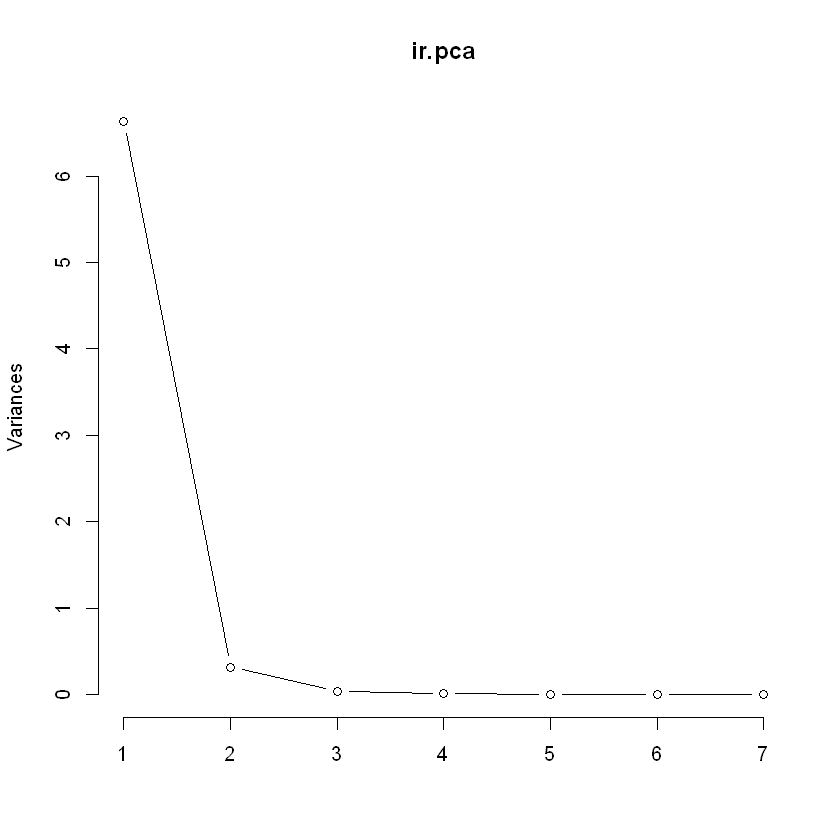

In [3]:
plot(ir.pca, type = "l")





In [4]:
# summary method
summary(ir.pca)

Importance of components:
                          PC1     PC2     PC3     PC4     PC5       PC6
Standard deviation     2.5753 0.56418 0.19024 0.09519 0.06356 3.452e-16
Proportion of Variance 0.9475 0.04547 0.00517 0.00129 0.00058 0.000e+00
Cumulative Proportion  0.9475 0.99296 0.99813 0.99942 1.00000 1.000e+00
                             PC7
Standard deviation     1.449e-17
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

In [5]:
predict(ir.pca,newdata=tail(log.ir, 2))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
65999,2.335569,-0.4371687,0.1650209,-0.1933917,-0.02962915,1.078252e-16,-6.225541e-16
66000,2.335998,-0.4363653,0.1648969,-0.1930464,-0.02942479,2.188470e-16,-5.115081e-16


In [6]:
library(devtools)
library(ggbiplot)

Loading required package: ggplot2


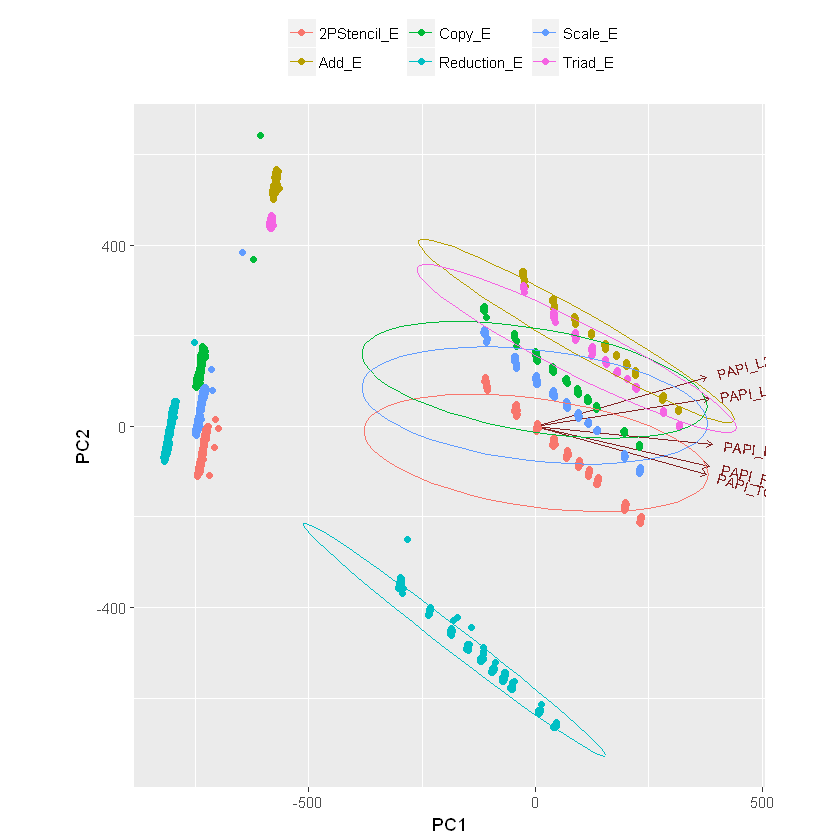

In [7]:
library(devtools)
library(ggplot2)
g <- ggbiplot(ir.pca, obs.scale = 1, var.scale = 1, groups = ir.label, ellipse = TRUE, circle = TRUE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)